In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = r"/Users/audrey/Documents/iresearch_2024/aging/NPHA_Wave10_January2022.dta"
data = pd.read_stata(file_path)
data

/var/folders/sb/qm7tssms7clf636f213q348r0000gn/T/ipykernel_40846/3398352050.py:2: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  data = pd.read_stata(file_path)


,caseid,weight,q1,q1_totaltime,q2,q2_totaltime,q3a,q3b,q3a_totaltime,q5_1,...,home_type,phoneservice,hhsize,hh01,hh25,hh612,hh1317,hh18ov,device,state
0,52.0,2.299200,Excellent,37.0,Excellent,4.0,1.0,0.0,16.0,No,...,A one-family house detached from any other house,Cellphone only,3.0,0.0,0.0,0.0,1.0,2.0,Desktop,TN
1,53.0,1.008387,Very good,5.0,Very good,6.0,2.0,0.0,19.0,Yes,...,A one-family house detached from any other house,"Have cellphone, but mostly use landline",2.0,0.0,0.0,0.0,0.0,2.0,Desktop,TX
2,54.0,0.329837,Excellent,5.0,Fair,6.0,2.0,0.0,8.0,No,...,A one-family house attached to one or more houses,Cellphone only,2.0,0.0,0.0,0.0,0.0,2.0,Desktop,MA
3,55.0,1.021066,Excellent,5.0,Excellent,4.0,2.0,0.0,16.0,Yes,...,A one-family house detached from any other house,"Have cellphone, but mostly use landline",2.0,0.0,0.0,0.0,0.0,2.0,Desktop,FL
4,56.0,0.168909,Good,8.0,Very good,7.0,SKIPPED ON WEB,3.0,15.0,Yes,...,A one-family house detached from any other house,Cellphone only,5.0,0.0,0.0,0.0,0.0,3.0,Smartphone,MO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,3377.0,1.217466,Good,5.0,Very good,5.0,1.0,0.0,10.0,No,...,A one-family house detached from any other house,"Have a landline, but mostly use cellphone",2.0,0.0,0.0,0.0,0.0,2.0,Desktop,WA
2273,3379.0,0.883898,Very good,5.0,Very good,5.0,2.0,0.0,18.0,No,...,A one-family house detached from any other house,Cellphone only,3.0,0.0,0.0,0.0,0.0,3.0,Desktop,IN
2274,3380.0,1.057663,Fair,7.0,Very good,6.0,0.0,0.0,21.0,Yes,...,A one-family house attached to one or more houses,"Have a landline, but mostly use cellphone",1.0,0.0,0.0,0.0,0.0,1.0,Desktop,CA
2275,3381.0,0.180892,Very good,7.0,Fair,12.0,1.0,SKIPPED ON WEB,3.0,Yes,...,A one-family house detached from any other house,"Have a landline, but mostly use cellphone",2.0,0.0,0.0,0.0,0.0,2.0,Smartphone,CA


In [3]:
# List of relevant columns based on the user's request
relevant_columns = [
    'q13_1', 'q13_2', 'q13_3', 'q12_1', 'q12_2', 'q12_3', 'q16a', 'q16b', 'q16c', 'q16d',
    'q11_1', 'q11_2', 'q11_3', 'q11_4', 'q11_5', 'q11_6', 'q7', 'q9', 'q37_2', 'q37_3',
    'q37_4', 'q37_5', 'q37_6', 'q38_1', 'q38_2', 'q38_3', 'q38_4', 'q58a', 'q58b', 'q58c',
    'q61', 'q65a', 'q65b', 'q65c', 'q66', 'q31', 'q32', 'q34', 'q38_5', 'q38_6', 'q38_7',
    'q38_8', 'q38_9', 'q38_10', 'q1', 'q2', 'q10a', 'q10b', 'q40', 'q41', 'q43_1', 'q43_2',
    'q43_3', 'q43_4', 'q43_5', 'q43_6', 'q43_7', 'q43_8', 'q43_9', 'age', 'age2', 'age4',
    'age7', 'gender', 'racethnicity', 'income', 'marital', 'educ5'
]

# Extract the relevant columns from the dataset
data_subset = data[relevant_columns]

# Display the first few rows of the subset data
data_subset.head()

,q13_1,q13_2,q13_3,q12_1,q12_2,q12_3,q16a,q16b,q16c,q16d,...,q43_9,age,age2,age4,age7,gender,racethnicity,income,marital,educ5
0,No,No,Yes,No,No,Yes,Definitely yes,Definitely yes,Definitely yes,Definitely yes,...,NaN,55.0,50-64,45-59,55-64,Male,"Black, non-Hispanic","$100,000 to $124,999",Married,Bachelor's degree
1,No,No,Yes,No,No,Yes,Definitely yes,Definitely yes,Probably yes,Probably yes,...,NaN,75.0,65-80,60+,75+,Male,"White, non-Hispanic","$85,000 to $99,999",Married,Bachelor's degree
2,No,No,Yes,No,No,Yes,Definitely yes,Definitely yes,Definitely yes,Definitely yes,...,Somewhat helpful,59.0,50-64,45-59,55-64,Female,"White, non-Hispanic","$100,000 to $124,999",Living with partner,Vocational/tech school/some college/ associates
3,No,No,Yes,No,No,Yes,Probably yes,Probably yes,Probably yes,Probably yes,...,NaN,74.0,65-80,60+,65-74,Male,"White, non-Hispanic","$100,000 to $124,999",Married,Bachelor's degree
4,No,No,Yes,No,No,Yes,Definitely yes,Definitely yes,Probably yes,Definitely yes,...,NaN,68.0,65-80,60+,65-74,Female,"White, non-Hispanic","$75,000 to $84,999",Widowed,Vocational/tech school/some college/ associates


In [4]:
# Descriptive statistics for numerical columns
descriptive_stats = data_encoded.describe()

# Correlation analysis
correlation_matrix = data_encoded.corr()

# Display the correlation matrix for the top correlated variables with physical health (q1) and mental health (q2)
correlation_physical_health = correlation_matrix['q1_Excellent'].sort_values(ascending=False).head(10)
correlation_mental_health = correlation_matrix['q2_Excellent'].sort_values(ascending=False).head(10)

correlation_physical_health, correlation_mental_health

NameError: name 'data_encoded' is not defined

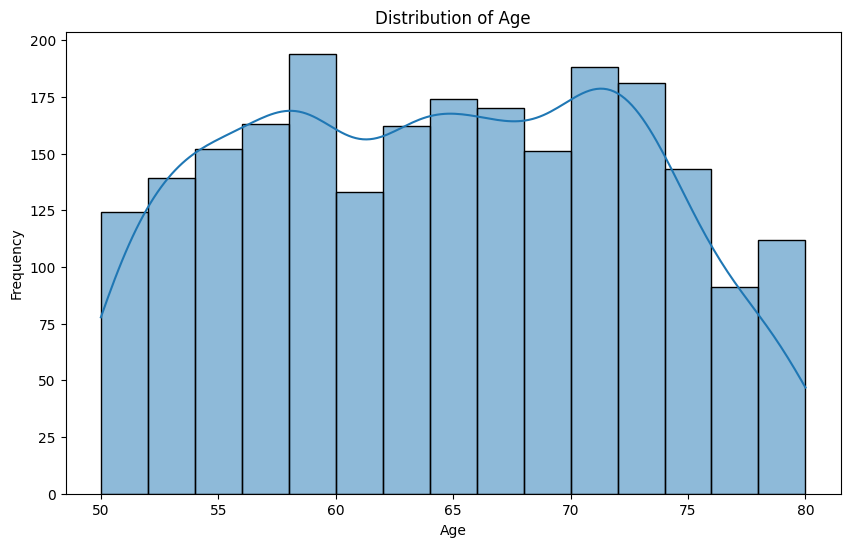

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(data['age'], kde = True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
race_counts = df['racethnicity'].value_counts()
race_names = race_counts.index
race_values = race_counts.values

NameError: name 'df' is not defined

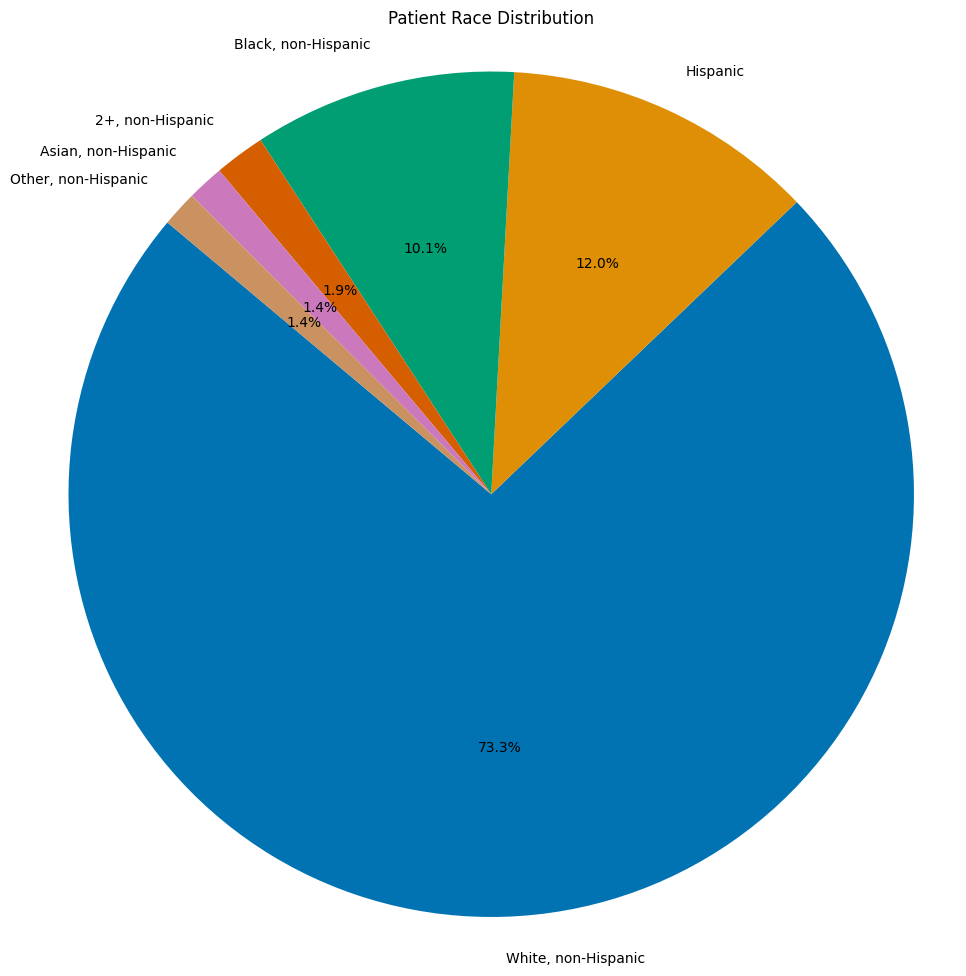

In [ ]:
sns.set_palette('colorblind')

plt.figure(figsize=(12,12))
plt.pie(race_values, labels=race_names, autopct= '%1.1f%%', startangle=140)
plt.title('Patient Race Distribution')
plt.axis('equal')
plt.show()

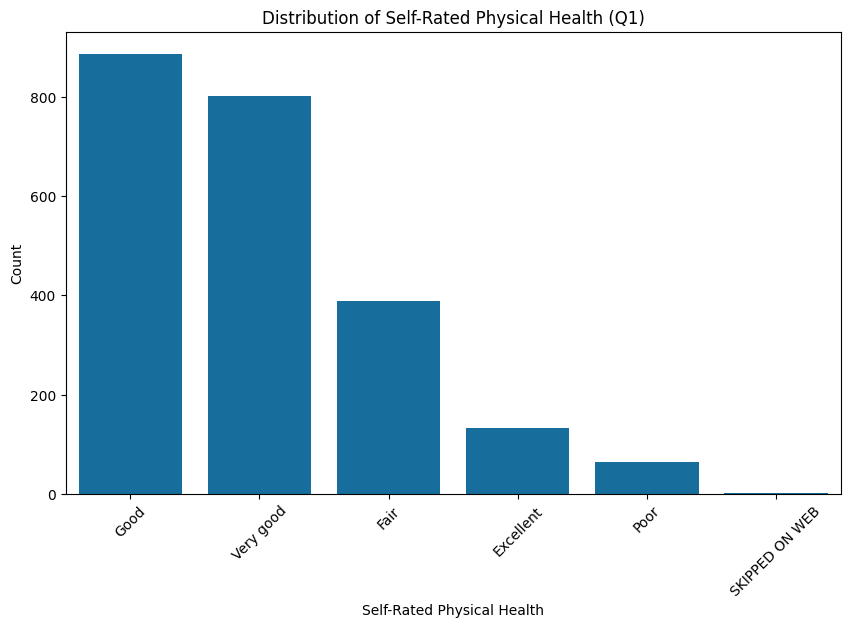

Label Mappings for Q1:
{0: 'Excellent', 1: 'Fair', 2: 'Good', 3: 'Poor', 4: 'SKIPPED ON WEB', 5: 'Very good'}
Label Mappings for Q2:
{0: 'Excellent', 1: 'Fair', 2: 'Good', 3: 'Poor', 4: 'SKIPPED ON WEB', 5: 'Very good'}
Label Mappings for Q6:
{0: 'No', 1: 'SKIPPED ON WEB', 2: 'Yes'}


In [ ]:
selected_columns = ['q1', 'q2', 'q6']
df_health = df[selected_columns]
df_health = df_health.dropna()

label_encoder_q1 = LabelEncoder()
label_encoder_q2 = LabelEncoder()
label_encoder_q6 = LabelEncoder()

df_health['q1_encoded'] = label_encoder_q1.fit_transform(df_health['q1'])
df_health['q2_encoded'] = label_encoder_q2.fit_transform(df_health['q2'])
df_health['q6_encoded'] = label_encoder_q6.fit_transform(df_health['q6'])

df_health['q1_labels'] = df_health['q1_encoded'].map(dict(zip(label_encoder_q1.transform(label_encoder_q1.classes_), label_encoder_q1.classes_)))
df_health['q2_labels'] = df_health['q2_encoded'].map(dict(zip(label_encoder_q2.transform(label_encoder_q2.classes_), label_encoder_q2.classes_)))
df_health['q6_labels'] = df_health['q6_encoded'].map(dict(zip(label_encoder_q6.transform(label_encoder_q6.classes_), label_encoder_q6.classes_)))
plt.figure(figsize=(10, 6))
sns.countplot(data=df_health, x='q1_labels', order=df_health['q1_labels'].value_counts().index)
plt.title('Distribution of Self-Rated Physical Health (Q1)')
plt.xlabel('Self-Rated Physical Health')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Label Mappings for Q1:")
print(dict(zip(label_encoder_q1.transform(label_encoder_q1.classes_), label_encoder_q1.classes_)))

print("Label Mappings for Q2:")
print(dict(zip(label_encoder_q2.transform(label_encoder_q2.classes_), label_encoder_q2.classes_)))

print("Label Mappings for Q6:")
print(dict(zip(label_encoder_q6.transform(label_encoder_q6.classes_), label_encoder_q6.classes_)))

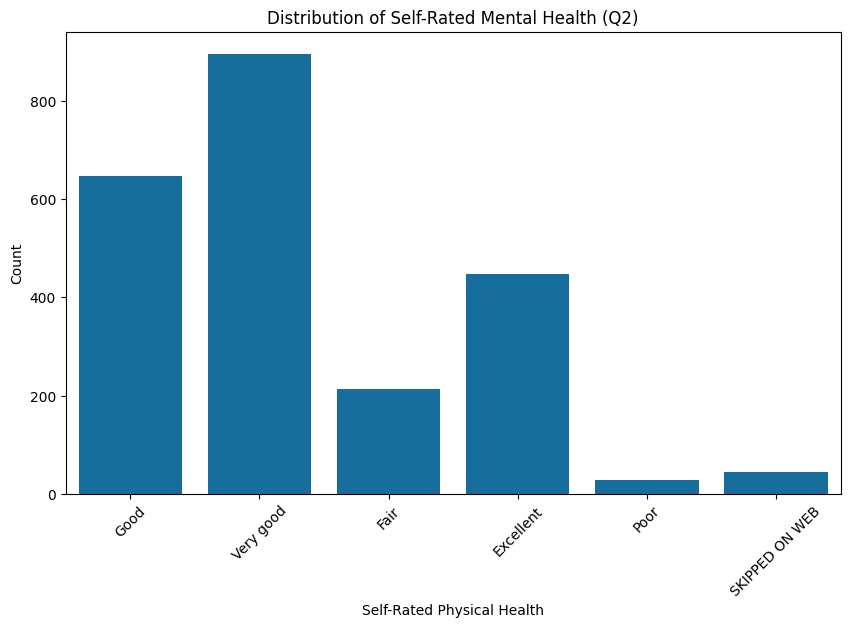

Label Mappings for Q1:
{0: 'Excellent', 1: 'Fair', 2: 'Good', 3: 'Poor', 4: 'SKIPPED ON WEB', 5: 'Very good'}
Label Mappings for Q2:
{0: 'Excellent', 1: 'Fair', 2: 'Good', 3: 'Poor', 4: 'SKIPPED ON WEB', 5: 'Very good'}
Label Mappings for Q6:
{0: 'No', 1: 'SKIPPED ON WEB', 2: 'Yes'}


In [ ]:
selected_columns = ['q1', 'q2', 'q6']
df_health = df[selected_columns]
df_health = df_health.dropna()

label_encoder_q1 = LabelEncoder()
label_encoder_q2 = LabelEncoder()
label_encoder_q6 = LabelEncoder()

df_health['q1_encoded'] = label_encoder_q1.fit_transform(df_health['q1'])
df_health['q2_encoded'] = label_encoder_q2.fit_transform(df_health['q2'])
df_health['q6_encoded'] = label_encoder_q6.fit_transform(df_health['q6'])

df_health['q1_labels'] = df_health['q1_encoded'].map(dict(zip(label_encoder_q1.transform(label_encoder_q1.classes_), label_encoder_q1.classes_)))
df_health['q2_labels'] = df_health['q2_encoded'].map(dict(zip(label_encoder_q2.transform(label_encoder_q2.classes_), label_encoder_q2.classes_)))
df_health['q6_labels'] = df_health['q6_encoded'].map(dict(zip(label_encoder_q6.transform(label_encoder_q6.classes_), label_encoder_q6.classes_)))
plt.figure(figsize=(10, 6))
sns.countplot(data=df_health, x='q2_labels', order=df_health['q1_labels'].value_counts().index)
plt.title('Distribution of Self-Rated Mental Health (Q2)')
plt.xlabel('Self-Rated Physical Health')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Label Mappings for Q1:")
print(dict(zip(label_encoder_q1.transform(label_encoder_q1.classes_), label_encoder_q1.classes_)))

print("Label Mappings for Q2:")
print(dict(zip(label_encoder_q2.transform(label_encoder_q2.classes_), label_encoder_q2.classes_)))

print("Label Mappings for Q6:")
print(dict(zip(label_encoder_q6.transform(label_encoder_q6.classes_), label_encoder_q6.classes_)))

<function matplotlib.pyplot.show(close=None, block=None)>

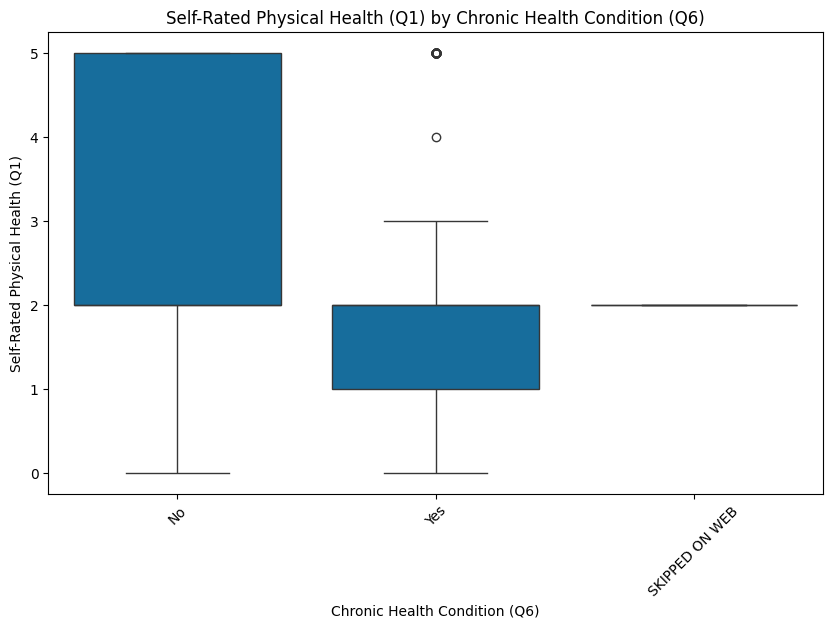

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df_health, x ='q6_labels', y='q1_encoded')
plt.title('Self-Rated Physical Health (Q1) by Chronic Health Condition (Q6)')
plt.xlabel('Chronic Health Condition (Q6)')
plt.ylabel('Self-Rated Physical Health (Q1)')
plt.xticks(rotation=45)
plt.show

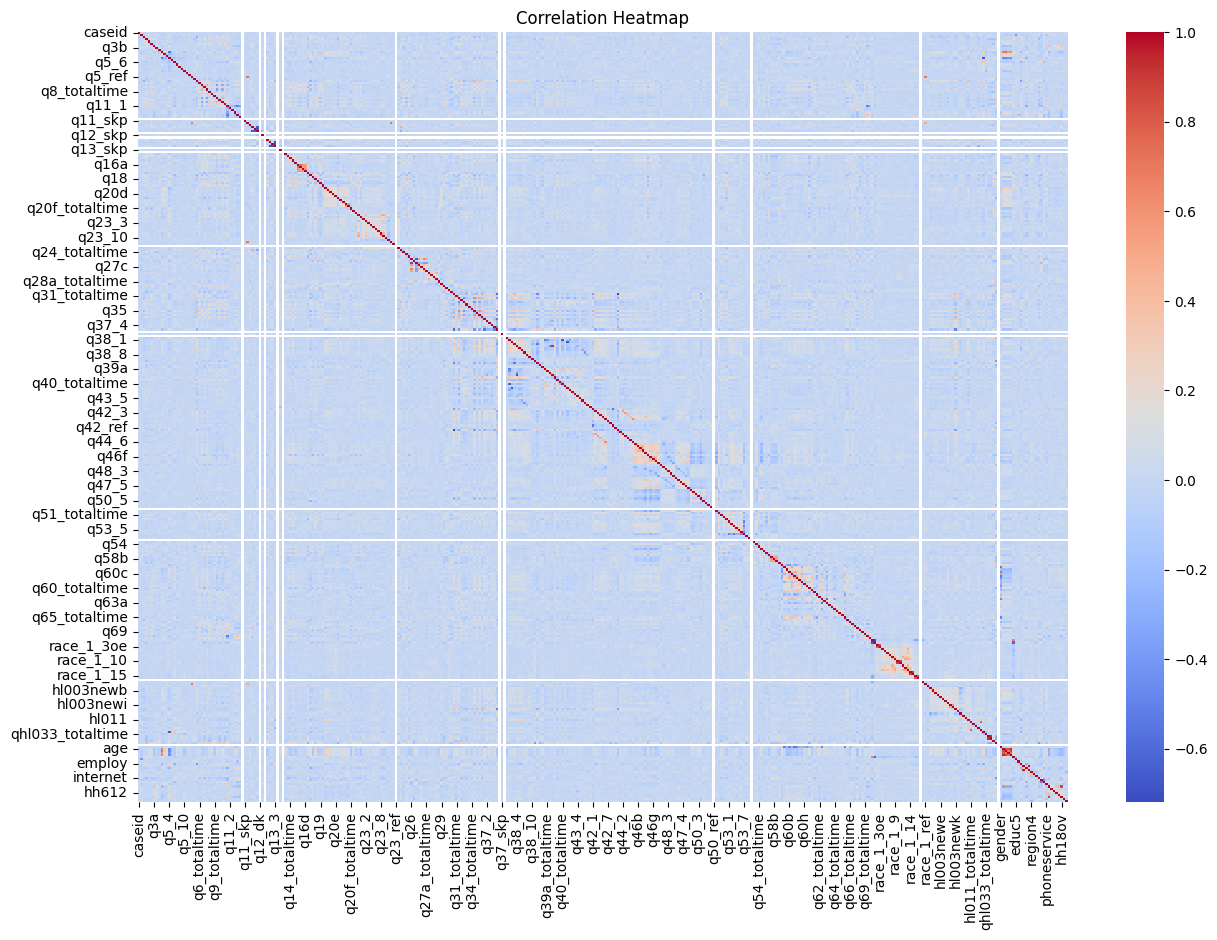

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
data_cleaned = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

for column in data_cleaned.select_dtypes(include=['object']).columns:
    data_cleaned[column] = data_cleaned[column].astype(str)

label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

plt.figure(figsize=(15, 10))
sns.heatmap(data_cleaned.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
correlation_matrix = data_cleaned.corr()


high_positive_correlations = correlation_matrix[(correlation_matrix > 0.7) & (correlation_matrix < 1.0)]
high_negative_correlations = correlation_matrix[(correlation_matrix < -0.7) & (correlation_matrix > -1.0)]

positive_corr_pairs = high_positive_correlations.unstack().dropna().sort_values(ascending=False)

negative_corr_pairs = high_negative_correlations.unstack().dropna().sort_values()

print("Highly Positive Correlations (Correlation > 0.7):")
print(positive_corr_pairs.reset_index().rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'}))

Highly Positive Correlations (Correlation > 0.7):
          Feature 1        Feature 2  Correlation
0           income9           income     0.971501
1            income          income9     0.971501
2              age7              age     0.945508
3               age             age7     0.945508
4           startdt            enddt     0.931480
5             enddt          startdt     0.931480
6       race_1_14oe        race_1_14     0.912737
7         race_1_14      race_1_14oe     0.912737
8         race_1_10      race_1_10oe     0.888152
9       race_1_10oe        race_1_10     0.888152
10             age7             age2     0.866586
11             age2             age7     0.866586
12           hhsize           hh18ov     0.859855
13           hh18ov           hhsize     0.859855
14              age             age2     0.858481
15             age2              age     0.858481
16       race_1_3oe         race_1_3     0.841070
17         race_1_3       race_1_3oe     0.841070


In [ ]:
print("\nHighly Negative Correlations (Correlation < -0.7):")
print(negative_corr_pairs.reset_index().rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'}))


Highly Negative Correlations (Correlation < -0.7):
       Feature 1      Feature 2  Correlation
0            q31  q42_totaltime    -0.719390
1  q42_totaltime            q31    -0.719390
2          q13_2          q13_3    -0.709221
3          q13_3          q13_2    -0.709221
4       race_1_1       race_1_2    -0.708821
5       race_1_2       race_1_1    -0.708821


In [ ]:
# Fill missing values for categorical variables with the mode
for column in data_subset.select_dtypes(include=['object']).columns:
    data_subset[column].fillna(data_subset[column].mode()[0], inplace=True)

# Fill missing values for numerical variables with the mean
for column in data_subset.select_dtypes(include=['float64', 'int64']).columns:
    data_subset[column].fillna(data_subset[column].mean(), inplace=True)

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data_subset)

# Display the cleaned and encoded data
data_encoded.head()

/var/folders/sb/qm7tssms7clf636f213q348r0000gn/T/ipykernel_86215/536125276.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_subset[column].fillna(data_subset[column].mean(), inplace=True)
/var/folders/sb/qm7tssms7clf636f213q348r0000gn/T/ipykernel_86215/536125276.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[column].fi

,age,q13_1_No,q13_1_Yes,q13_2_No,q13_2_Yes,q13_3_No,q13_3_Yes,q12_1_No,q12_1_Yes,q12_2_No,...,marital_Widowed,marital_Divorced,marital_Separated,marital_Never married,marital_Living with partner,educ5_Less than HS,educ5_HS graduate or equivalent,educ5_Vocational/tech school/some college/ associates,educ5_Bachelor's degree,educ5_Post grad study/professional degree
0,55.0,True,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,True,False
1,75.0,True,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,True,False
2,59.0,True,False,True,False,False,True,True,False,True,...,False,False,False,False,True,False,False,True,False,False
3,74.0,True,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,True,False
4,68.0,True,False,True,False,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False


In [ ]:
# Fill missing values for categorical variables with the mode
for column in data_subset.select_dtypes(include=['object']).columns:
    data_subset[column].fillna(data_subset[column].mode()[0], inplace=True)

# Fill missing values for numerical variables with the mean
for column in data_subset.select_dtypes(include=['float64', 'int64']).columns:
    data_subset[column].fillna(data_subset[column].mean(), inplace=True)

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data_subset)

# Display the cleaned and encoded data
data_encoded.head()

/var/folders/sb/qm7tssms7clf636f213q348r0000gn/T/ipykernel_86215/536125276.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_subset[column].fillna(data_subset[column].mean(), inplace=True)
/var/folders/sb/qm7tssms7clf636f213q348r0000gn/T/ipykernel_86215/536125276.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[column].fi

,age,q13_1_No,q13_1_Yes,q13_2_No,q13_2_Yes,q13_3_No,q13_3_Yes,q12_1_No,q12_1_Yes,q12_2_No,...,marital_Widowed,marital_Divorced,marital_Separated,marital_Never married,marital_Living with partner,educ5_Less than HS,educ5_HS graduate or equivalent,educ5_Vocational/tech school/some college/ associates,educ5_Bachelor's degree,educ5_Post grad study/professional degree
0,55.0,True,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,True,False
1,75.0,True,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,True,False
2,59.0,True,False,True,False,False,True,True,False,True,...,False,False,False,False,True,False,False,True,False,False
3,74.0,True,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,True,False
4,68.0,True,False,True,False,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False


In [ ]:
# Descriptive statistics for numerical columns
descriptive_stats = data_encoded.describe()

# Correlation analysis
correlation_matrix = data_encoded.corr()

# Display the correlation matrix for the top correlated variables with physical health (q1) and mental health (q2)
correlation_physical_health = correlation_matrix['q1_Excellent'].sort_values(ascending=False).head(10)
correlation_mental_health = correlation_matrix['q2_Excellent'].sort_values(ascending=False).head(10)

correlation_physical_health, correlation_mental_health

(q1_Excellent                                 1.000000
 q2_Excellent                                 0.345233
 q10a_Very satisfied                          0.154604
 educ5_Post grad study/professional degree    0.135936
 q31_No                                       0.134381
 q37_6_Yes                                    0.114649
 q10b_Very satisfied                          0.104527
 q38_3_No                                     0.100648
 q66_No                                       0.098358
 q43_7_Very helpful                           0.094404
 Name: q1_Excellent, dtype: float64,
 q2_Excellent           1.000000
 q1_Excellent           0.345233
 q10a_Very satisfied    0.251932
 q10b_Very satisfied    0.242976
 q7_Hardly ever         0.204279
 q16d_Definitely yes    0.155942
 q1_Very good           0.143374
 q16c_Definitely yes    0.134764
 q16b_Definitely yes    0.131789
 q16a_Definitely yes    0.128728
 Name: q2_Excellent, dtype: float64)

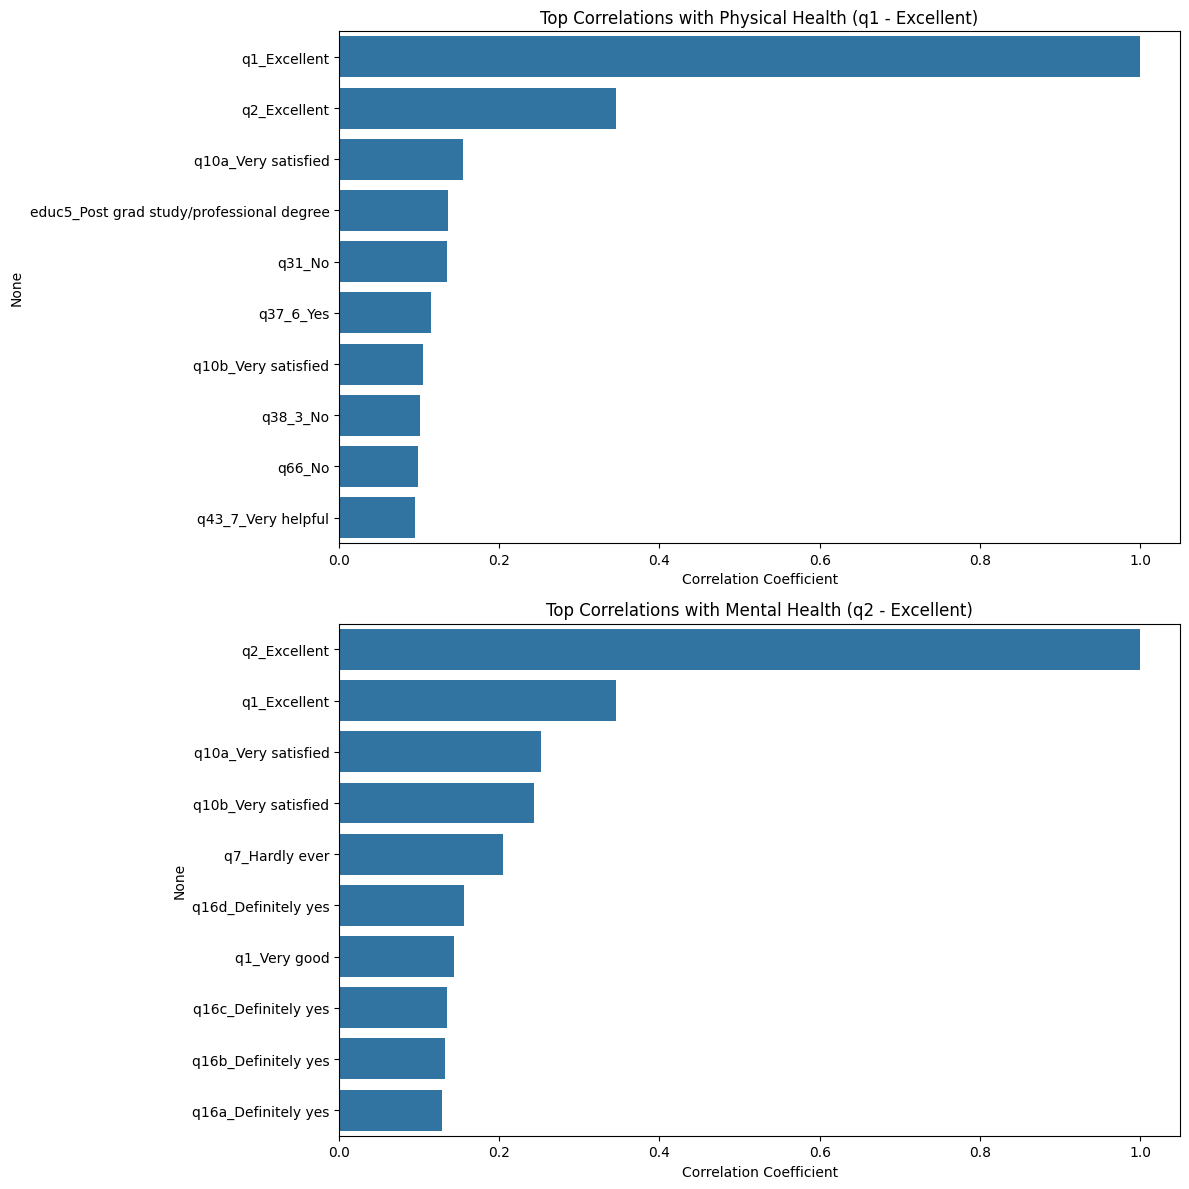

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar charts for top correlations
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Top correlations with physical health (q1 - Excellent)
sns.barplot(x=correlation_physical_health.values, y=correlation_physical_health.index, ax=axes[0])
axes[0].set_title('Top Correlations with Physical Health (q1 - Excellent)')
axes[0].set_xlabel('Correlation Coefficient')

# Top correlations with mental health (q2 - Excellent)
sns.barplot(x=correlation_mental_health.values, y=correlation_mental_health.index, ax=axes[1])
axes[1].set_title('Top Correlations with Mental Health (q2 - Excellent)')
axes[1].set_xlabel('Correlation Coefficient')

plt.tight_layout()
plt.show()

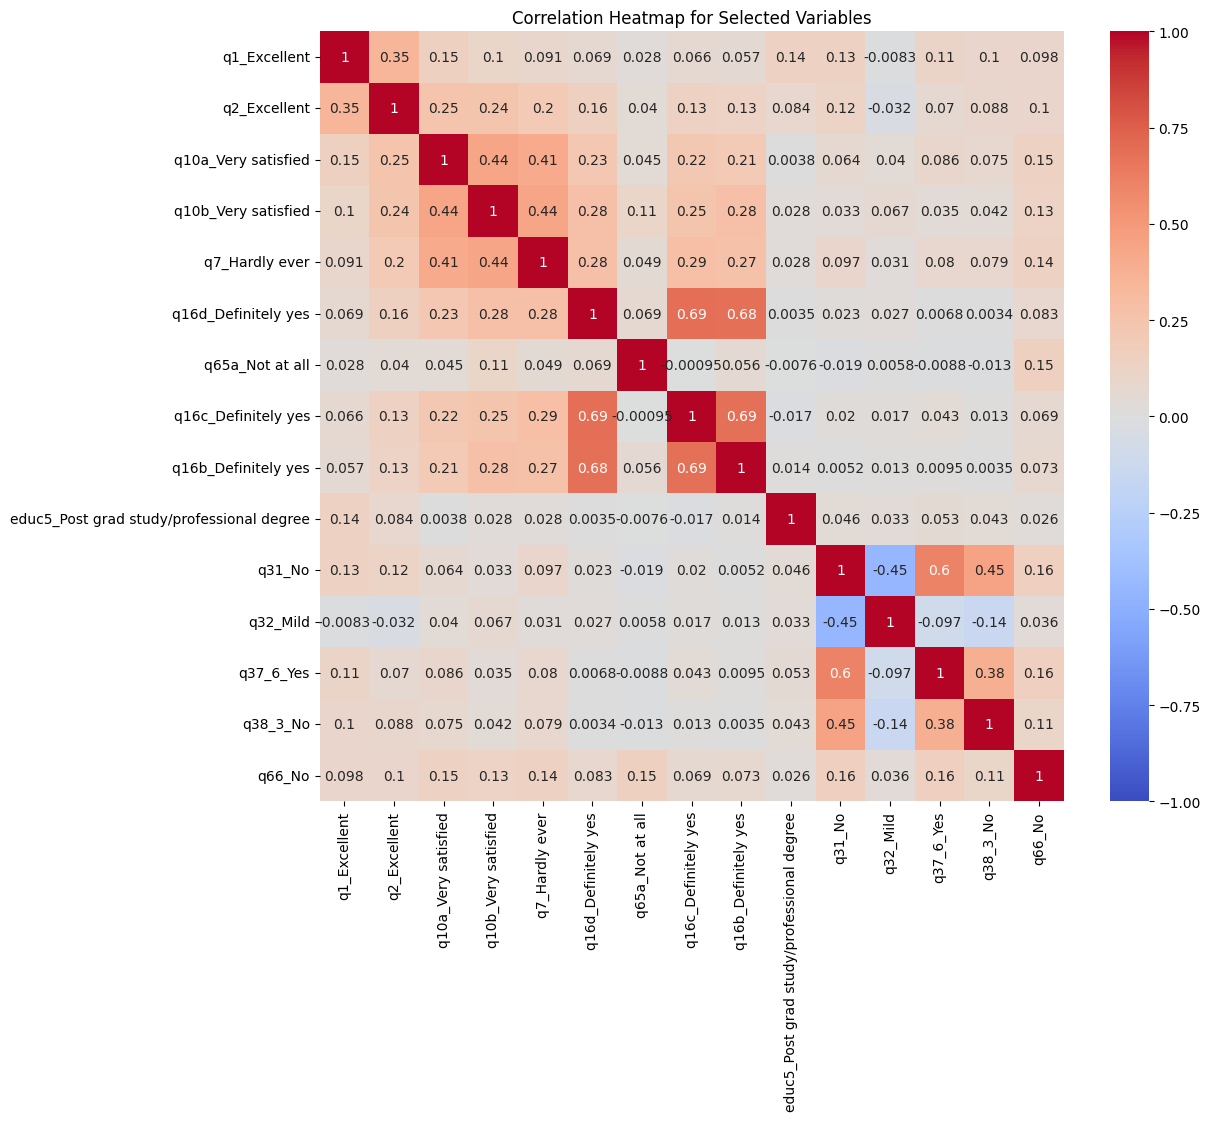

In [ ]:
# Select a subset of variables for the heatmap to avoid overcrowding
heatmap_vars = [
    'q1_Excellent', 'q2_Excellent', 'q10a_Very satisfied', 'q10b_Very satisfied', 'q7_Hardly ever',
    'q16d_Definitely yes', 'q65a_Not at all', 'q16c_Definitely yes', 'q16b_Definitely yes',
    'educ5_Post grad study/professional degree', 'q31_No', 'q32_Mild', 'q37_6_Yes', 'q38_3_No', 'q66_No'
]

# Create a correlation matrix for the selected variables
heatmap_corr = data_encoded[heatmap_vars].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Selected Variables')
plt.show()

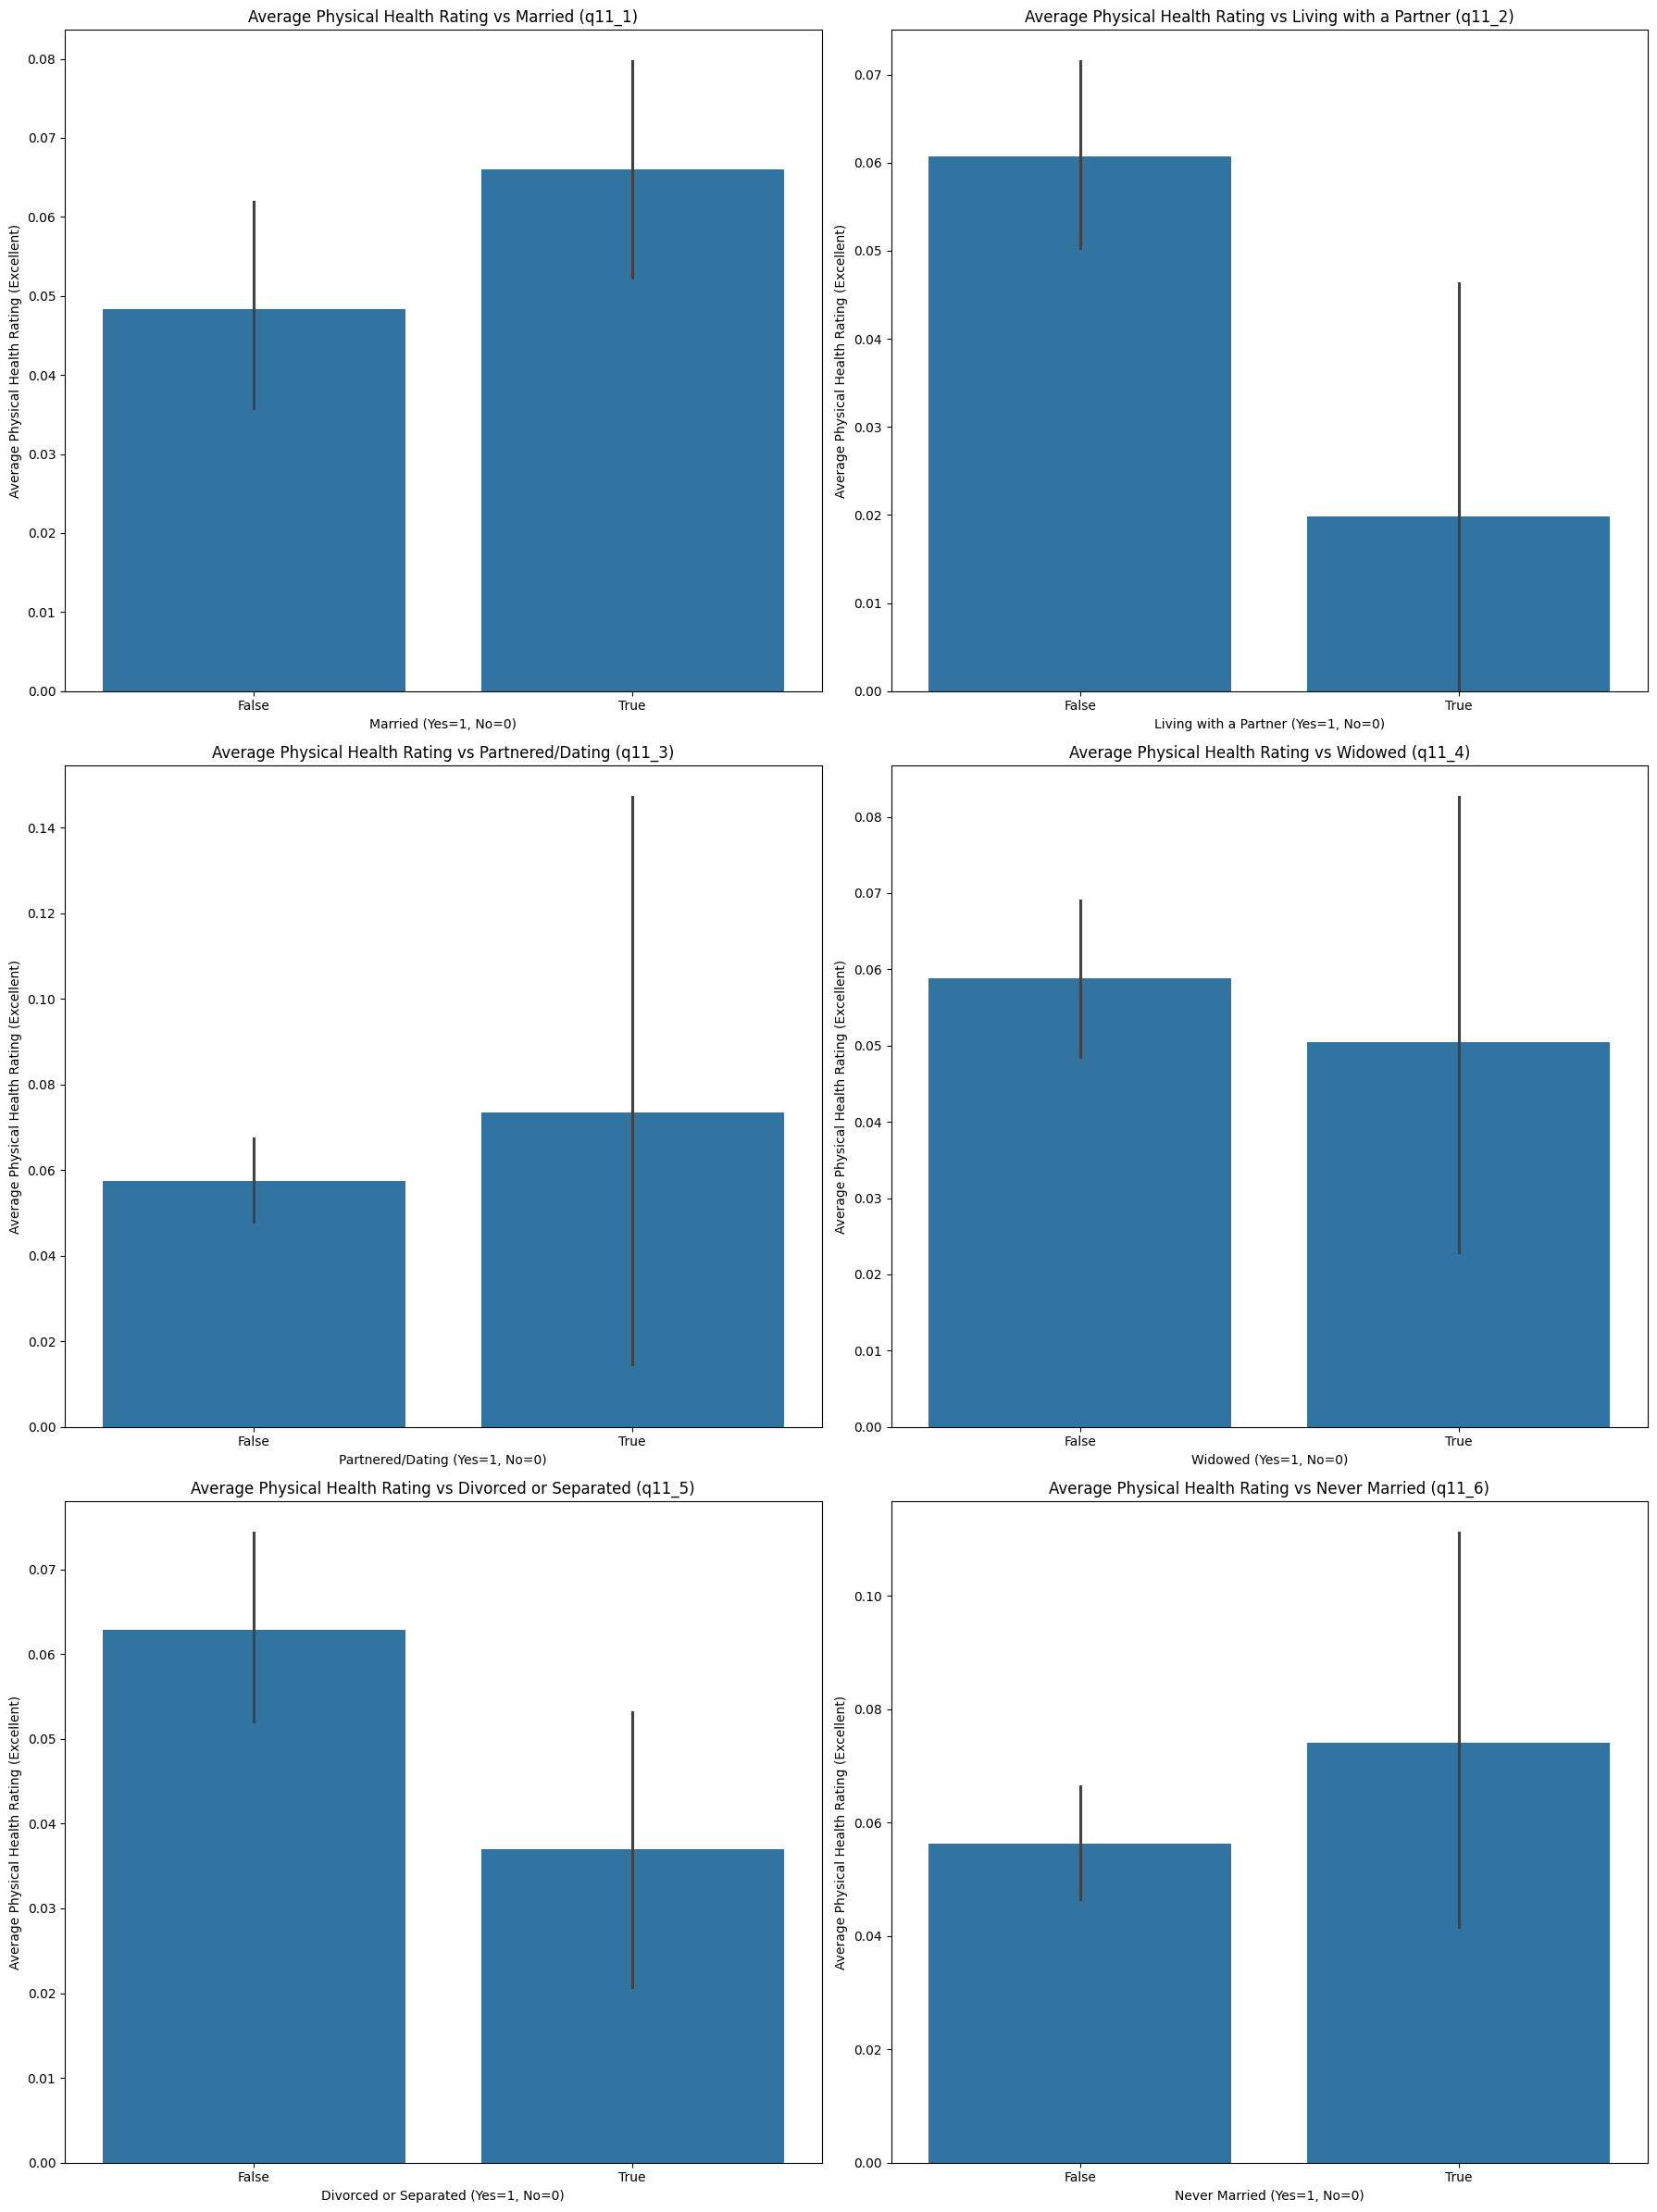

In [ ]:
# Bar charts for relationship status variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 24))

# Married (q11_1)
sns.barplot(x='q11_1_Yes', y='q1_Excellent', data=data_encoded, ax=axes[0, 0])
axes[0, 0].set_title('Average Physical Health Rating vs Married (q11_1)')
axes[0, 0].set_xlabel('Married (Yes=1, No=0)')
axes[0, 0].set_ylabel('Average Physical Health Rating (Excellent)')

# Living with a Partner (q11_2)
sns.barplot(x='q11_2_Yes', y='q1_Excellent', data=data_encoded, ax=axes[0, 1])
axes[0, 1].set_title('Average Physical Health Rating vs Living with a Partner (q11_2)')
axes[0, 1].set_xlabel('Living with a Partner (Yes=1, No=0)')
axes[0, 1].set_ylabel('Average Physical Health Rating (Excellent)')

# Partnered/Dating (q11_3)
sns.barplot(x='q11_3_Yes', y='q1_Excellent', data=data_encoded, ax=axes[1, 0])
axes[1, 0].set_title('Average Physical Health Rating vs Partnered/Dating (q11_3)')
axes[1, 0].set_xlabel('Partnered/Dating (Yes=1, No=0)')
axes[1, 0].set_ylabel('Average Physical Health Rating (Excellent)')

# Widowed (q11_4)
sns.barplot(x='q11_4_Yes', y='q1_Excellent', data=data_encoded, ax=axes[1, 1])
axes[1, 1].set_title('Average Physical Health Rating vs Widowed (q11_4)')
axes[1, 1].set_xlabel('Widowed (Yes=1, No=0)')
axes[1, 1].set_ylabel('Average Physical Health Rating (Excellent)')

# Divorced or Separated (q11_5)
sns.barplot(x='q11_5_Yes', y='q1_Excellent', data=data_encoded, ax=axes[2, 0])
axes[2, 0].set_title('Average Physical Health Rating vs Divorced or Separated (q11_5)')
axes[2, 0].set_xlabel('Divorced or Separated (Yes=1, No=0)')
axes[2, 0].set_ylabel('Average Physical Health Rating (Excellent)')

# Never Married (q11_6)
sns.barplot(x='q11_6_Yes', y='q1_Excellent', data=data_encoded, ax=axes[2, 1])
axes[2, 1].set_title('Average Physical Health Rating vs Never Married (q11_6)')
axes[2, 1].set_xlabel('Never Married (Yes=1, No=0)')
axes[2, 1].set_ylabel('Average Physical Health Rating (Excellent)')

plt.tight_layout()
plt.show()

In [ ]:
# Load the dataset
data = pd.read_csv(file_path)

# List of relevant columns based on the research questions
relevant_columns = [
    'q13_1', 'q13_2', 'q13_3', 'q12_1', 'q12_2', 'q12_3', 'q16a', 'q16b', 'q16c', 'q16d',
    'q11_1', 'q11_2', 'q11_3', 'q11_4', 'q11_5', 'q11_6', 'q7', 'q9', 'q37_2', 'q37_3',
    'q37_4', 'q37_5', 'q37_6', 'q38_1', 'q38_2', 'q38_3', 'q38_4', 'q58a', 'q58b', 'q58c',
    'q61', 'q65a', 'q65b', 'q65c', 'q66', 'q31', 'q32', 'q34', 'q38_5', 'q38_6', 'q38_7',
    'q38_8', 'q38_9', 'q38_10', 'q1', 'q2', 'q10a', 'q10b', 'q40', 'q41', 'q43_1', 'q43_2',
    'q43_3', 'q43_4', 'q43_5', 'q43_6', 'q43_7', 'q43_8', 'q43_9', 'age', 'age2', 'age4',
    'age7', 'gender', 'racethnicity', 'income', 'marital', 'educ5'
]

# Extract the relevant columns from the dataset
data_subset = data[relevant_columns]

# Fill missing values for categorical variables with the mode
for column in data_subset.select_dtypes(include=['object']).columns:
    data_subset[column].fillna(data_subset[column].mode()[0], inplace=True)

# Fill missing values for numerical variables with the mean
for column in data_subset.select_dtypes(include=['float64', 'int64']).columns:
    data_subset[column].fillna(data_subset[column].mean(), inplace=True)

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data_subset, drop_first=False)

# Standardize numerical variables
numerical_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Ensure all columns are numeric
data_encoded = data_encoded.apply(pd.to_numeric, errors='coerce')
data_encoded = data_encoded.fillna(0)  # Fill any remaining NaNs with 0

# Define target variables for physical and mental health
target_physical_health = 'q1_Excellent'  # Replace with the actual target variable for physical health
target_mental_health = 'q2_Excellent'    # Replace with the actual target variable for mental health

# Ensure target variables are binary or properly encoded
if target_physical_health in data_encoded.columns and data_encoded[target_physical_health].dtype == 'object':
    label_encoder = LabelEncoder()
    data_encoded[target_physical_health] = label_encoder.fit_transform(data_encoded[target_physical_health])

if target_mental_health in data_encoded.columns and data_encoded[target_mental_health].dtype == 'object':
    label_encoder = LabelEncoder()
    data_encoded[target_mental_health] = label_encoder.fit_transform(data_encoded[target_mental_health])

# Split the data into training and testing sets
X = data_encoded.drop(columns=[target_physical_health, target_mental_health])
y_physical = data_encoded[target_physical_health]
y_mental = data_encoded[target_mental_health]

X_train_physical, X_test_physical, y_train_physical, y_test_physical = train_test_split(X, y_physical, test_size=0.2, random_state=42)
X_train_mental, X_test_mental, y_train_mental, y_test_mental = train_test_split(X, y_mental, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier(max_iter=500)
}

# Function to train and evaluate models
def train_evaluate_models(X_train, X_test, y_train, y_test):
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        if hasattr(model, "predict_proba"):
            roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        else:
            roc_auc = "N/A"  # Some models like DecisionTreeClassifier do not have predict_proba
        results[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}
    return results

# Train and evaluate models for physical health
results_physical = train_evaluate_models(X_train_physical, X_test_physical, y_train_physical, y_test_physical)
results_physical_df = pd.DataFrame(results_physical).T
print("Physical Health Model Results")
print(results_physical_df)

# Train and evaluate models for mental health
results_mental = train_evaluate_models(X_train_mental, X_test_mental, y_train_mental, y_test_mental)
results_mental_df = pd.DataFrame(results_mental).T
print("Mental Health Model Results")
print(results_mental_df)

# Personalized Intervention Strategies
def personalized_interventions(model, X_test, threshold=0.5):
    predictions = model.predict_proba(X_test)[:, 1]
    high_risk_indices = np.where(predictions > threshold)[0]
    return high_risk_indices

# Select the best model for physical health (based on accuracy)
best_model_physical = GradientBoostingClassifier().fit(X_train_physical, y_train_physical)
high_risk_physical = personalized_interventions(best_model_physical, X_test_physical)

# Select the best model for mental health (based on accuracy)
best_model_mental = GradientBoostingClassifier().fit(X_train_mental, y_train_mental)
high_risk_mental = personalized_interventions(best_model_mental, X_test_mental)

print("High-risk individuals for physical health interventions:", high_risk_physical)
print("High-risk individuals for mental health interventions:", high_risk_mental)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 79: invalid continuation byte